In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_table("../Datasets/breast-cancer-wisconsin.data", 
     sep=",", 
     names=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11' ], 
     index_col="C1")

In [3]:
df=df.reset_index()

In [4]:
has_invalid=df[df['C7']=='?']
df.drop(list(has_invalid.index), axis=0, inplace=True)
df['C7']=pd.to_numeric(df['C7'])

In [5]:
df.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   C1      683 non-null    int64
 1   C2      683 non-null    int64
 2   C3      683 non-null    int64
 3   C4      683 non-null    int64
 4   C5      683 non-null    int64
 5   C6      683 non-null    int64
 6   C7      683 non-null    int64
 7   C8      683 non-null    int64
 8   C9      683 non-null    int64
 9   C10     683 non-null    int64
 10  C11     683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [8]:
cols=['C2','C3','C4','C5','C6','C7','C8','C9','C10' ]
print("Column\tCleanliness\t\tV")
vals={i: {} for i in cols}
final_vals=[]
for c in cols:
    highest_clean=0
    best_clean=0
    for v in range(1,11):
        set1=[]
        set2=[]
        for i in df.index:
            j = df[c][i]
            if j<v:
                set1.append(df[df.index==i])
            else:
                set2.append(df[df.index==i])
#         print(len(set1), len(set2),len(df[c]),'\n')
        
        if set1!=[]:
            class1=0
            class2=0
            for i in set1:
                if int(i['C11'])==2:
                    class1+=1
                else:
                    class2+=1
            clean1=max(class1, class2)/len(set1)
#             print("Set1\t{}\t{}\t{}\t{}\t{}".format(c, v, class1, class2, clean1))
        else:
            clean1=1
#             print("Set1 is empty")
        if set2!=[]:
            class1=0
            class2=0
            for i in set2:
                if int(i['C11'])==2:
                    class1+=1
                else:
                    class2+=1
            clean2=max(class1, class2)/len(set2)
#             print("Set2\t{}\t{}\t{}\t{}\t{}".format(c, v, class1, class2, clean2))
#             print()
        else:
            clean2=1
#             print("Set2 is empty")
        total_clean=clean1+clean2
        vals[c][v]=total_clean
        if highest_clean<total_clean:
            highest_clean=total_clean
            best_clean=v
    print("{}\t{}\t{}".format(c, highest_clean, best_clean))

Column	Cleanliness		V
C2	1.7903064415259538	7
C3	1.869633403256418	4
C4	1.8459073217017485	4
C5	1.7720457060271437	4
C6	1.7738671079429735	4
C7	1.8260280468802927	6
C8	1.8195529383487563	4
C9	1.792595905386603	3
C10	1.6752901829628173	3


In [374]:
vals

{'C2': {1: 1.6500732064421668,
  2: 1.5445937367752856,
  3: 1.4933273354325984,
  4: 1.4992561477203115,
  5: 1.585476956055734,
  6: 1.7387103825136612,
  7: 1.7903064415259538,
  8: 1.7598708434826942,
  9: 1.74,
  10: 1.7231270358306188},
 'C3': {1: 1.6500732064421668,
  2: 1.74734065553922,
  3: 1.827895639613614,
  4: 1.869633403256418,
  5: 1.8509673790776153,
  6: 1.7990129470580696,
  7: 1.758303730017762,
  8: 1.739648191623286,
  9: 1.7125308780597348,
  10: 1.7207792207792207},
 'C4': {1: 1.6500732064421668,
  2: 1.6974837481346803,
  3: 1.8020955321338585,
  4: 1.8459073217017485,
  5: 1.8357486338797813,
  6: 1.7920753871433552,
  7: 1.7615060927500656,
  8: 1.738707422938277,
  9: 1.7184466019417477,
  10: 1.7104},
 'C5': {1: 1.6500732064421668,
  2: 1.6443537773098185,
  3: 1.6972627876748987,
  4: 1.7720457060271437,
  5: 1.7476904556279607,
  6: 1.7448627568621569,
  7: 1.7456634178952184,
  8: 1.7276611813339695,
  9: 1.6929867448935245,
  10: 1.6872321945570352},
 '

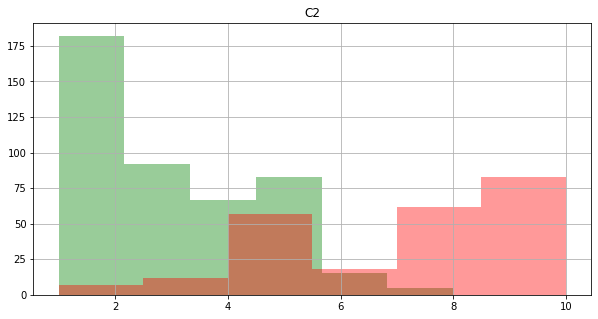

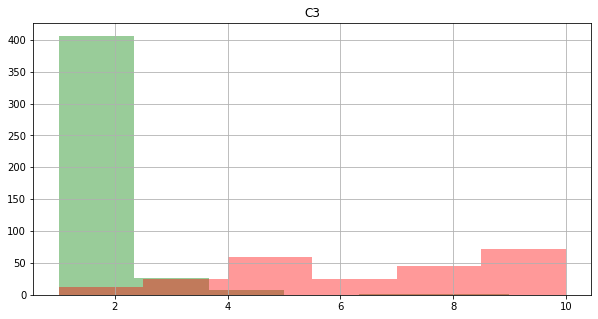

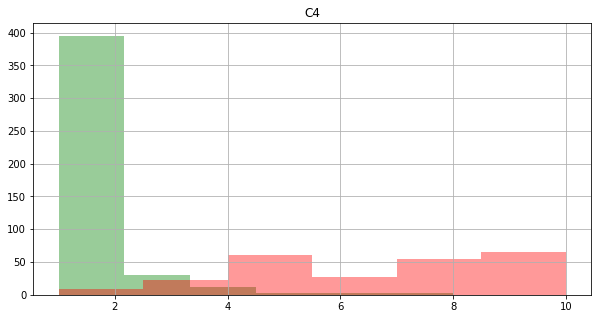

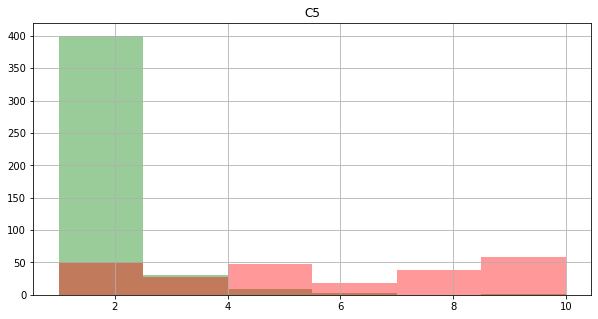

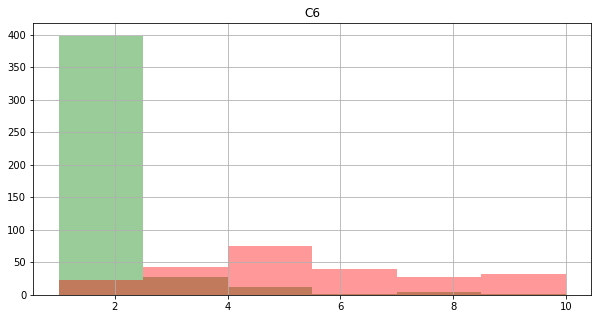

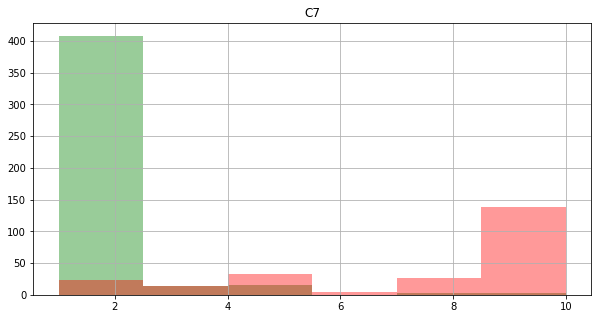

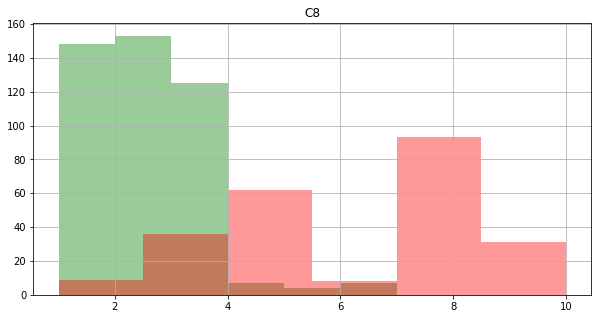

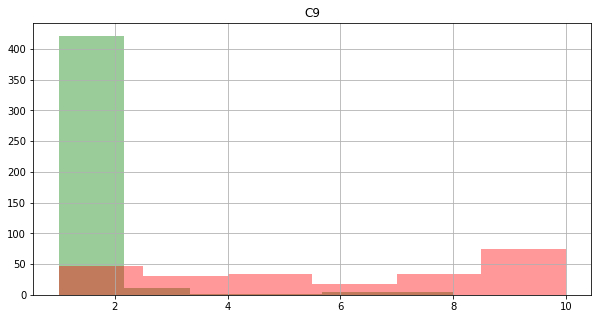

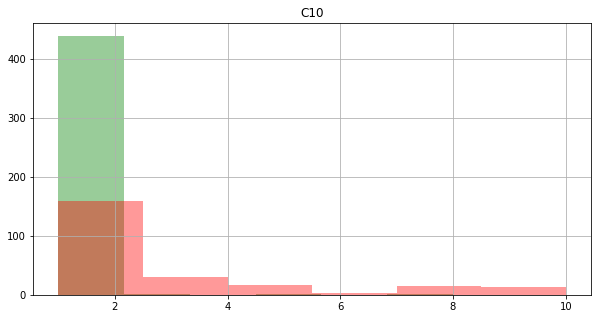

In [375]:
is2 = df[df['C11']==2] 
is4 = df[df['C11']==4]
for i in range(2, 11):
    x2= is2['C'+str(i)].hist(bins=6, color='green', alpha=0.4, figsize=[10,5])
    x4= is4['C'+str(i)].hist(bins=6, color='red', alpha=0.4, figsize=[10,5]) 
    plt.title('C'+str(i))
    plt.show()